Nome: Pedro Paulo Dantas Silva Martins

Lista 2, respostas.

**1 - (Kernels em todo canto)**

a) Sabemos que o $\beta_0$ captura justamente o deslocamento dos nossos dados, caso os dados não fossem deslocados (com relação a origem), o nosso $\beta_0$ seria 0.<br>
E o ato de tirarmos a média de todos os dados, é justamente o processo que centraliza os dados com relação a origem. Logo quando fazemos isso o $\beta_0 = 0$.

b) $\hat{\beta} = argmin_{\tilde{\beta}} \sum_{i=1}^n (y_i - \sum_{j=1}^p x_{ij} \tilde{\beta_j})^2 + \lambda \sum_{j=1}^p \tilde{\beta_j}^2$<br>
É possível perceber que nesse caso não há uso de matrizes e vetores. A conta é feita pelas entradas. Transformarei para a forma vetorial e matricial.


$\hat{\beta} = argmin_{\tilde{\beta}} (Y - X \tilde{\beta})^T (Y - X \tilde{\beta}) + \lambda I \tilde{\beta}^T \tilde{\beta}$ Sabemos que o problema é convexo. Logo, se derivarmos em relação ao $\tilde{\beta}$ e igualarmos a 0 será o ponto de mínimo global, e portanto acharemos o nosso $\hat{\beta}$

$-2X^T (Y - X \hat{\beta}) + 2\lambda I \hat{\beta} = 0$ &harr; $-X^T Y + X^T X \hat{\beta} + \lambda I \hat{\beta} = 0$ &harr; $(X^T X + \lambda I
\hat{\beta} = X^T Y$ &harr; $\hat{\beta} = (X^T X + \lambda I)^{-1} X^T Y$

É possível perceber que realmente quando $\lambda = 0$ temos que o nosso $\hat{\beta}$ é igual ao de uma regressão linear.

c) $\hat{\beta} = (X^T X + \lambda I)^{-1} X^T Y$ Usando a fórmula sugerida pelo enunciado temos:<br>
$\hat{\beta} = (\frac{1}{\lambda} I - \frac{1}{\lambda} I X^T (I + X \frac{1}{\lambda} I X^T)^{-1}X \frac{1}{\lambda} I) X^T Y$<br>
$\hat{\beta} = \frac{1}{\lambda}IX^TY - \frac{1}{\lambda} I X^T(I + X\frac{1}{\lambda}I X^T)^{-1} X \frac{1}{\lambda} I X^T Y$ (Obs.: Perceba que $\frac{1}{\lambda} I X^T = X^T \frac{1}{\lambda} I$. Logo botamos o $X^T$ em evidência pela esquerda.)<br>
$\hat{\beta} = X^T(\frac{1}{\lambda} I Y - \frac{1}{\lambda} I (I + X \frac{1}{\lambda} I X^T)^{-1} X \frac{1}{\lambda} I X^T Y)$; Se definirmos nosso $\alpha = \frac{1}{\lambda} I Y - \frac{1}{\lambda} I (I + X \frac{1}{\lambda} I X^T)^{-1} X \frac{1}{\lambda} I X^T Y$<br>
$\hat{\beta} = X^T \alpha$ &harr; $\hat{\beta} = \sum_{i=1}^{n} \alpha_i x_i$

d) Sabemos que uma previsão é feita $y_* = \beta x_*$ ($\beta_0 = 0$). Portanto a previsão seria:<br>
$y_* = \sum_{i=1}^{n} \alpha_i x_i x_*$

e) Já constatamos que $f(x) = \sum_{i=1}^{n} \alpha_i x_i x$

É importante ressaltar a dimensão das coisas. $x_i \in \mathcal{R}^P$ são as observações anteriores sendo uma linha da Matriz principal. $x$ é um vetor com os parâmetros da nova observação. Portanto, é fácil ver que:<br>
$f(x) = \sum_{i=1}^{n} \alpha_i \langle x_i', x \rangle$

Agora podemos substituir esse produto interno por alguma outra função que respeite certas propriedades, e chamamos essa função de kernel $\mathbf{K}(.,.)$.

Logo podemos reescrever a $f(x)$ para um kernel qualquer:<br>
$f(x) = \sum_{i=1}^{n} \alpha_i \mathbf{K}(x_i',x)$

f) Realmente a fórmula para o coeficiente que achamos é a mesma para o SVM. Porém, lembrando das condições KKT para SVM, para todo ponto que não seja ponto de suporte o nosso $\alpha$ do ponto será $0$.

Logo uma diferença essencial é justamente a esparsidade do nosso $\alpha$, há muitos $0$ no SVM.

In [1]:
# G)
# Código pronto

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , KFold
from sklearn.linear_model import Ridge , LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from tqdm import tqdm


number_of_folds = 10
data = pd.read_csv("./bodyfat.csv")
X = data.drop(columns =["BodyFat","Density"])
y = data["BodyFat"]
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [2]:
# Fazendo a normalização dos dados.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# (i) MSE da regressão linear nos dados de teste:
lr = LinearRegression().fit(X_train, y_train)
y_hat_lr = lr.predict(X_test)

def MSE(y_hat, y=y_test):
    tamanho = y_hat.shape[0]
    MSE = np.sum((y_hat - y)**2)/tamanho
    return MSE

lr_MSE = MSE(y_hat_lr)
print(lr_MSE)

15.910489104854406


In [4]:
# (ii) MSE do ridge nos dados de teste:
from sklearn.preprocessing import StandardScaler

alphas = 10**np.linspace(3,-2,100)
ridge_cv_mse = []
y_vector = np.array(y_train)

for alpha in tqdm(alphas):
    cv_MSE = []
    folds = KFold(n_splits=number_of_folds, shuffle=True, random_state=2023).split(X_train , y_vector)
    for train_idx , val_idx in folds:
        ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
        ridge_pipeline[1].fit(X_train[train_idx], y_vector[train_idx]) # treine seu modelo nos folds de treino
        y_hat = ridge_pipeline[1].predict(X_train[val_idx]) # faça suas previsões no fold de validação
        cv_MSE.append(MSE(y_hat, y_vector[val_idx])) # salve o MSE encontrado no fold de validação

    ridge_cv_mse.append(np.mean(cv_MSE))

index_min = ridge_cv_mse.index(min(ridge_cv_mse))
optimal_alpha = alphas[index_min] # encontre o melhor valor de alpha
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=optimal_alpha))
ridge_pipeline[1].fit(X_train, y_train) # treine seu modelo em todo o conjunto de treino

y_hat_ridge = ridge_pipeline[1].predict(X_test)
ridge_MSE = MSE(y_hat_ridge)
print(ridge_MSE)

100%|██████████| 100/100 [00:02<00:00, 49.69it/s]

15.872514115940753


In [5]:
# (iii) e (IV) Obtendo os optimal hyperparams para a kernel ridge e também calculando seu MSE

kernels = ["linear", "polynomial", "rbf", "laplacian"]
gammas = [10**-3]
alphas = 10**np.linspace(3, -2, 100)
hyperparams = [( kernel , gamma , alpha) for kernel in kernels for gamma in gammas for alpha in alphas]
Kernelridge_cv_mse = []

for hyperparam in tqdm(hyperparams):
    kernel = hyperparam[0]
    gamma = hyperparam[1]
    alpha = hyperparam[2]

    cv_MSE = []
    folds = KFold(n_splits=number_of_folds, shuffle=True, random_state=2023).split(X_train , y_train)
    y_vector = np.array(y_train)
    for train_idx , val_idx in folds:
        Kernelridge_pipeline = make_pipeline(StandardScaler(), KernelRidge(alpha=alpha, kernel=kernel, gamma=gamma))
        Kernelridge_pipeline[1].fit(X_train[train_idx], y_vector[train_idx]) # treine seu modelo nos folds de treino
        y_hat = Kernelridge_pipeline[1].predict(X_train[val_idx]) # faça suas previsões no fold de validação
        cv_MSE.append(MSE(y_hat, y_vector[val_idx])) # salve o MSE encontrado no fold de validação

    Kernelridge_cv_mse.append(np.mean(cv_MSE))

index_min = Kernelridge_cv_mse.index(min(Kernelridge_cv_mse))
optimal_hyperparam = hyperparams[index_min] # encontre o melhor valor de alpha
optimal_kernel = optimal_hyperparam[0]
optimal_gamma = optimal_hyperparam[1]
optimal_alpha = optimal_hyperparam[2]

Kernelridge_pipeline = make_pipeline(StandardScaler(), KernelRidge(alpha=optimal_alpha, kernel=optimal_kernel, gamma=optimal_gamma))
Kernelridge_pipeline[1].fit(X_train, y_train) # treine seu modelo em todo o conjunto de treino

y_hat_Kernelridge = Kernelridge_pipeline[1].predict(X_test)
Kernelridge_MSE = MSE(y_hat_Kernelridge)
print(Kernelridge_MSE)
print(optimal_hyperparam)

100%|██████████| 400/400 [00:29<00:00, 13.56it/s]


14.663798962219209
('rbf', 0.001, 0.01)


**2 - (Kernel radial)**

a) $\sum_{j=1}^{n} \sum_{i=1}^{n} c_i \mathbf{K}(x_i, x_j) c_j \geq 0$ &harr; $C^T \mathbf{K} C \geq 0$

Só devemos ficar atento sobre as dimensões: <br>
$\mathbf{K}(x_i, x_j) \in \R$;<br>
$\mathbf{K}$ é uma matriz $n$ x $n$ de entradas $\mathbf{K}(x_i, x_j)$;<br>
$C \in \R^n$, Vetor contendo os c's;

*(i)* $C^T (c \mathbf{K}_1 + d) C$ &rarr; $C^Tc \mathbf{K}_1 C + C^TdC$, quando $c > 0$ e $d \geq 0$ isso sempre será positivo. Pois, sabemos que $c C^T \mathbf{K}_1 C > 0$ e $d C^T C \geq 0$ ;<br>
Portanto, $C^T (c \mathbf{K} + d) C \geq 0$.

*(ii)* $C^T (\mathbf{K}_1 + \mathbf{K}_2) C$ &rarr; $C^T \mathbf{K}_1 C + C^T \mathbf{K}_2 C$, sabemos que isso sempre será positivo. Pois, $\mathbf{K}_1$ e $\mathbf{K}_2$ são kernels.<br>
Portanto, $C^T (\mathbf{K}_1 + \mathbf{K}_2) C \geq 0$.

*(iii)* É possível perceber que a matriz nova será o produto hadamard entre as matrizes $\mathbf{K}_1$ e $\mathbf{K}_2$; (Produto que é feito entrada a entrada)<br>
$C^T (\mathbf{K}_1 \otimes \mathbf{K}_2) C$; E como sabemos o produto hadamard entre duas matrizes positivas semi-definidas também é uma matriz positiva semi-definida.



(iv) $\lim_{l\to\infty} \sum_{j=1}^{n} \sum_{i=1}^{n} c_i \mathbf{K}_l(x_i, x_j) c_j$ &harr; $\sum_{j=1}^{n} \sum_{i=1}^{n} c_i c_j \lim_{l\to\infty} \mathbf{K}_l(x_i, x_j)$; É possível perceber que respeita a condição de ser $\geq 0$. Isto porque 

*(v)* Usaremos um conjunto das preposições anteriores. $e^{\mathbf{K_1}(x, x')} = \sum_{i=1}^{\infty} \frac{\mathbf{K_1}(x, x')^i}{i!}$;<br>
Esse somatório é um kernel. Pois são operações que mantém a propriedade de kernel.

*(vi)* $f(x) \mathbf{K_1}(x, x') f(x')$ &harr; $f(x) \Phi_1(x)^T \Phi_1(x') f(x')$; É possível definir um novo $\Phi$ a partir disso $\Phi(x) = f(x)\Phi_1(x)$<br>
E assim definimos um kernel novo que possui esse $\Phi$.

*(vii)* $e^{-\gamma \parallel x - x'\parallel^2}$ &harr; $e^{-\gamma < x - x', x - x'>}$ &harr; $e^{-\gamma (< x, x > - 2< x, x' > + < x', x' >)}$ &harr; $e^{- \gamma x^T x} e^{\gamma 2x^T x'} e^{- \gamma x'^T x'}$; É possível perceber esse caso é justamente o (vi) e o (v), só falta provarmos que $2 \gamma x^T x'$ é um kernel.<br>

E para isso podemos montar uma função $\phi(x) = x\sqrt{2 \gamma}$; Com essa função nós conseguimos montar o kernel que precisamos.

In [6]:
# c) (i) Importando as coisas pedidas

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN


def apply_svm_no_intercept(svm, X):
    dec_func = svm.decision_function(X) - svm.intercept_
    return np.sign(dec_func)

# Função auxiliar para plotar região de decisão
def plot_decision_boundary(clf, X, y, h=0.01, pad=0.05):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    plt.scatter(X[y==-1, 0], X[y==-1, 1], s=70, c="blue", label=-1)
    plt.scatter(X[y==1, 0] , X[y==1, 1] , s=70, c="orange", label=1)
    if 0 in y:
        plt.scatter(X[y==0, 0] , X[y==0 ,1] , s=70, c="blue", label=-1)
    
    if type(clf) == SVC:
        Z = apply_svm_no_intercept(clf, np.c_[xx.ravel(), yy.ravel()])
        sv = clf.support_vectors_
        plt.scatter(sv[:,0], sv[:,1], c='w', marker='*', s=21, linewidths=1)
        print('Número de vetores de suporte: ', clf.support_.size)

    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show ()

n = 100 # Número de pontos por classe
d = 2 # Dimensão
k = 2 # Número de classes
X = np.zeros ((n*k,d))
y = np.zeros(n*k)
r = np.linspace (0.0 ,1 ,n) # Raio
np.random.seed(42)

for j in range(k):
    ind = range(n*j, n*(j+1))
    t = np.linspace(j*4, (j+1)*4, n) + np.random.randn(n)*0.4 # theta
    X[ind] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ind] = j
    

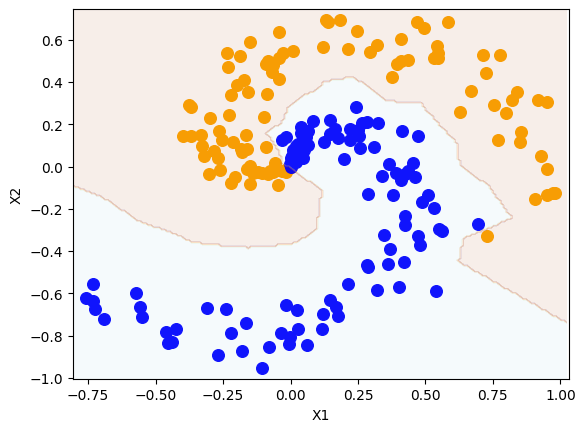

In [7]:
# (ii) Treinando kNN com k=1 e plotando.

kNeighbors = KNN(n_neighbors=1).fit(X, y)
plot_decision_boundary(kNeighbors, X, y)

Número de vetores de suporte:  95


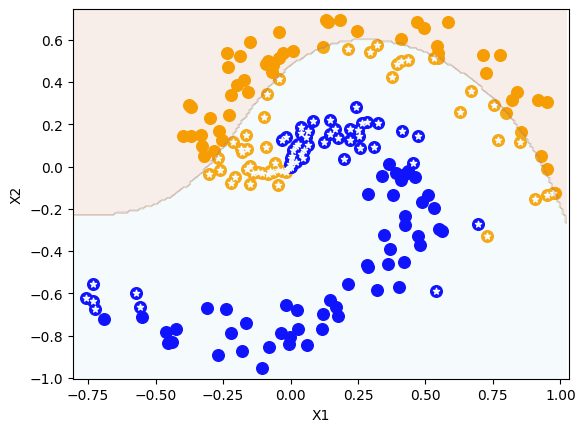

Número de vetores de suporte:  51


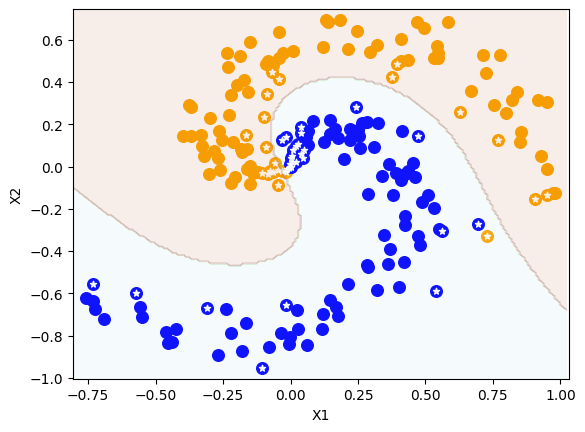

Número de vetores de suporte:  120


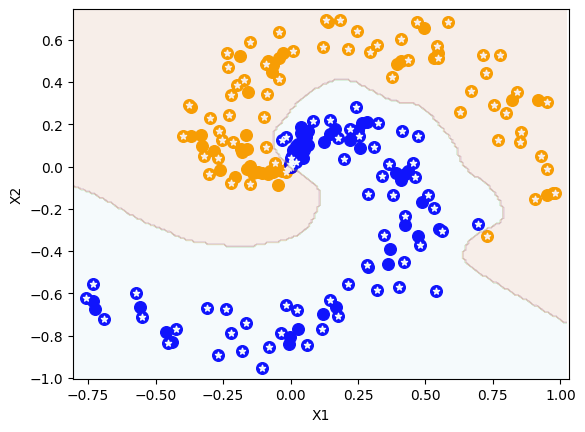

In [8]:
# (iii) Treinando o SVM com gamma [1, 5, 100]

gs = [1, 5, 100]
for g in gs:
    svm = SVC(C=1, kernel='rbf', gamma=g, random_state=42).fit(X, y)
    plot_decision_boundary(svm, X, y)

**5 - (MNIST)**

c:\Users\samsung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


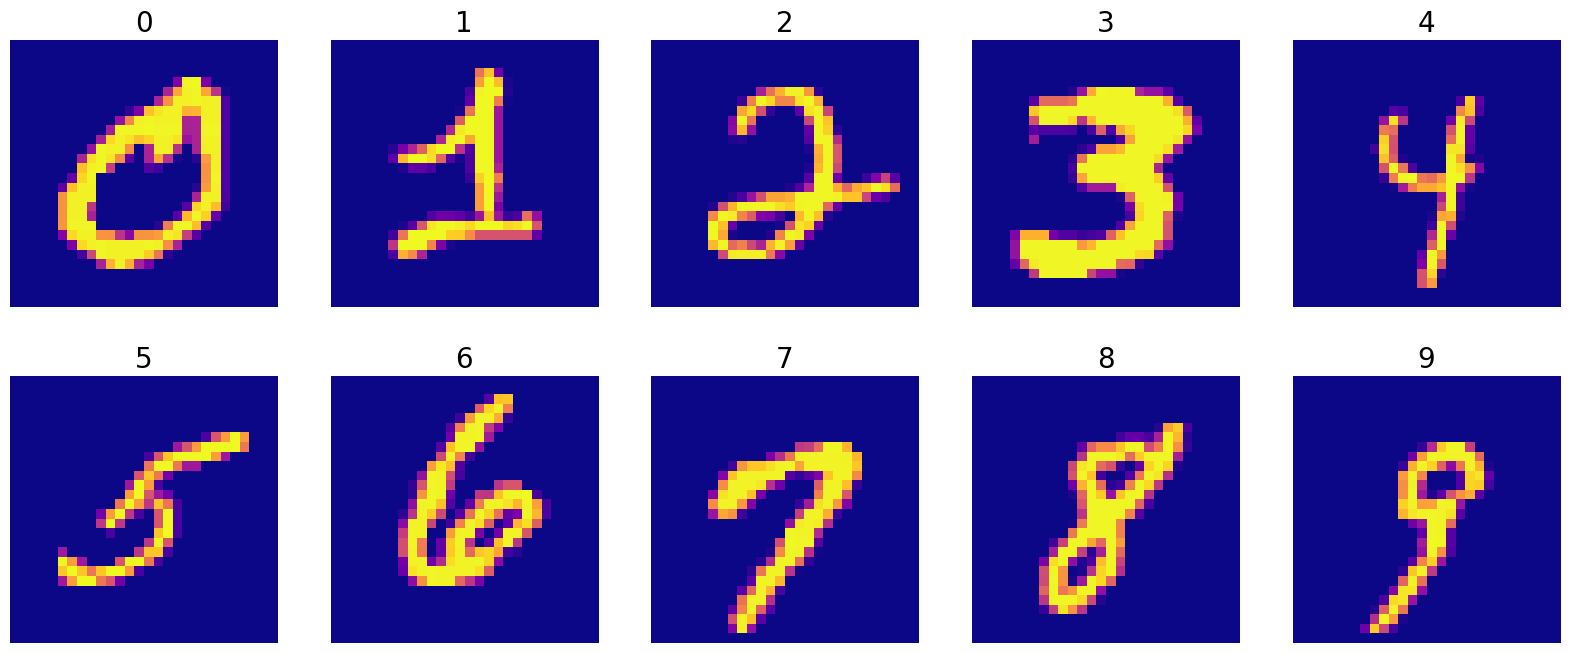

In [9]:
# 5 (MNIST)

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt


def plot_digits(images, 
                n_rows = 2, 
                n_cols = 5, 
                fig_shape = (20, 8), 
                indexes = [0,1,2,3,4,5,6,7,8,9],
                img_shape = (28 ,28), 
                labels = [0, 1, 2, 3, 4, 5 , 6, 7, 8, 9]):
    fig, axs = plt.subplots(n_rows, n_cols, figsize=fig_shape )
    ind = np.array(indexes). reshape(n_rows, n_cols )
    if labels:
        plt_labels = np.array(labels ). reshape(n_rows, n_cols )

    for i in range(0, n_rows):
        for j in range(0, n_cols):
            if labels:
                axs[i,j].set_title(plt_labels[i,j], fontsize=20)
            
            axs[i,j].imshow ((images[ind[i,j]]. reshape(img_shape)), cmap = "plasma")
            axs[i,j].axis('off')

mnist = fetch_openml("mnist_784") # Baixar os dados

X, y = mnist.data.to_numpy(), mnist.target.to_numpy()
X = X/255 # Colocar as features em [0, 1]
# Divisão em treino e teste
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Plot dos digítos
plot_digits(X,
            n_rows = 2,
            n_cols = 5,
            indexes = [21, 24, 16, 27, 26, 35, 13, 15, 17, 19])

In [10]:
# Importando as coisas pedidas

from time import process_time

nb = BernoulliNB(force_alpha=True) # Naive Bayes com features bernoulli
lda = LinearDiscriminantAnalysis() # LDA
qda = QuadraticDiscriminantAnalysis() # QDA
lr = LogisticRegression(random_state =42) # Regressão Logística
knn = KNeighborsClassifier(n_neighbors =6) # kNN com k = 6
svc = svm.SVC(gamma="scale", class_weight ="balanced", C=100) # SVM
rf = RandomForestClassifier(max_depth=30, random_state =0, n_estimators=100) # Random forest
nn = MLPClassifier (random_state=42, hidden_layer_sizes = [100], max_iter =300) # Rede neural

scaler_train, scaler_test = StandardScaler().fit(X_train), StandardScaler().fit(X_test)
X_train = scaler_train.transform(X_train)
X_test = scaler_test.transform(X_test)

In [11]:
# Definindo uma função perda

def MSE(y_hat, y=y_test):
    tamanho = y_hat.shape[0]
    resultado = y_hat == y
    MSE = np.sum((resultado)**2)/tamanho
    return MSE

In [12]:
# Treinando os modelos

modelos = [nb, lda, qda, lr, knn, svc, rf, nn]
time = []
acuracias = []

for modelo in modelos:
    start_train = process_time()
    metodo = modelo.fit(X_train, y_train)
    end_train = process_time()
    time_train = end_train - start_train

    start_predict = process_time()
    y_hat_test = metodo.predict(X_test)
    end_predict = process_time()
    time_predict = end_predict - start_predict
    
    time.append([time_train, time_predict])

    y_hat_train = metodo.predict(X_train)

    acuracia_train = MSE(y_hat_train, y_train)
    acuracia_test = MSE(y_hat_test, y_test)

    acuracias.append([acuracia_train, acuracia_test])


c:\Users\samsung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\samsung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Fazendo o print sobre as informações dos modelos.

modelos_name = ['Naive Bayes Bernoulli', 
                'Linear Discriminant Analysis', 
                'Quadratic Discriminant Analysis', 
                'Logistic Regression', 
                'k Neighbors Classifier',
                'Support Vector Classifier',
                'Random Forest Classifier',
                'Neural Network']
acuracia_media_1 = 0
acuracia_media_2 = 0

time_treino_medio_1 = 0
time_treino_medio_2 = 0

time_prever_medio_1 = 0
time_prever_medio_2 = 0

for i, nome in enumerate(modelos_name):
    if i < 5:
        acuracia_media_1 += acuracias[i][1] / 5
        time_treino_medio_1 += time[i][0] / 5
        time_prever_medio_1 += time[i][1] / 5
    else:
        acuracia_media_2 += acuracias[i][1] / 3
        time_treino_medio_2 += time[i][0] / 3
        time_prever_medio_2 += time[i][1] / 3
    
    print('='*60)
    print(f'{nome :^60}')
    print(f'Tempo treinando:{time[i][0] :.3f}s, Acurácia no treino: {acuracias[i][0] :.3f}')
    print(f'Tempo prevendo:{time[i][1] :.3f}s, Acurácia no teste: {acuracias[i][1] :.3f}')
    print()

print('='*60)
print(f'Primeira parte:')
print(f'acurácia média no teste {acuracia_media_1 :.3f}')
print(f'Tempo médio de treino {time_treino_medio_1 :.3f}')
print(f'Tempo médio de previsão {time_prever_medio_1 :.3f}')


print('='*60)
print(f'Segunda parte:')
print(f'acurácia média no teste {acuracia_media_2 :.3f}')
print(f'Tempo médio de treino {time_treino_medio_2 :.3f}')
print(f'Tempo médio de previsão {time_prever_medio_2 :.3f}')

                   Naive Bayes Bernoulli                    
Tempo treinando:0.875s, Acurácia no treino: 0.830
Tempo prevendo:0.312s, Acurácia no teste: 0.834

                Linear Discriminant Analysis                
Tempo treinando:32.312s, Acurácia no treino: 0.873
Tempo prevendo:0.109s, Acurácia no teste: 0.869

              Quadratic Discriminant Analysis               
Tempo treinando:22.953s, Acurácia no treino: 0.507
Tempo prevendo:13.672s, Acurácia no teste: 0.184

                    Logistic Regression                     
Tempo treinando:67.266s, Acurácia no treino: 0.945
Tempo prevendo:0.094s, Acurácia no teste: 0.915

                   k Neighbors Classifier                   
Tempo treinando:0.078s, Acurácia no treino: 0.959
Tempo prevendo:125.422s, Acurácia no teste: 0.943

                 Support Vector Classifier                  
Tempo treinando:124.594s, Acurácia no treino: 1.000
Tempo prevendo:51.719s, Acurácia no teste: 0.970

                  Random Forest

É possível perceber uma clara melhora na acurácia média dos métodos da segunda parte. O que já era esperado, tendo em vista que são modelos mais complexos e que são conhecidamente melhores nesse tipo de problema. Em contra partida, o tempo de treinamento médio aumentou em cerca de 200%.

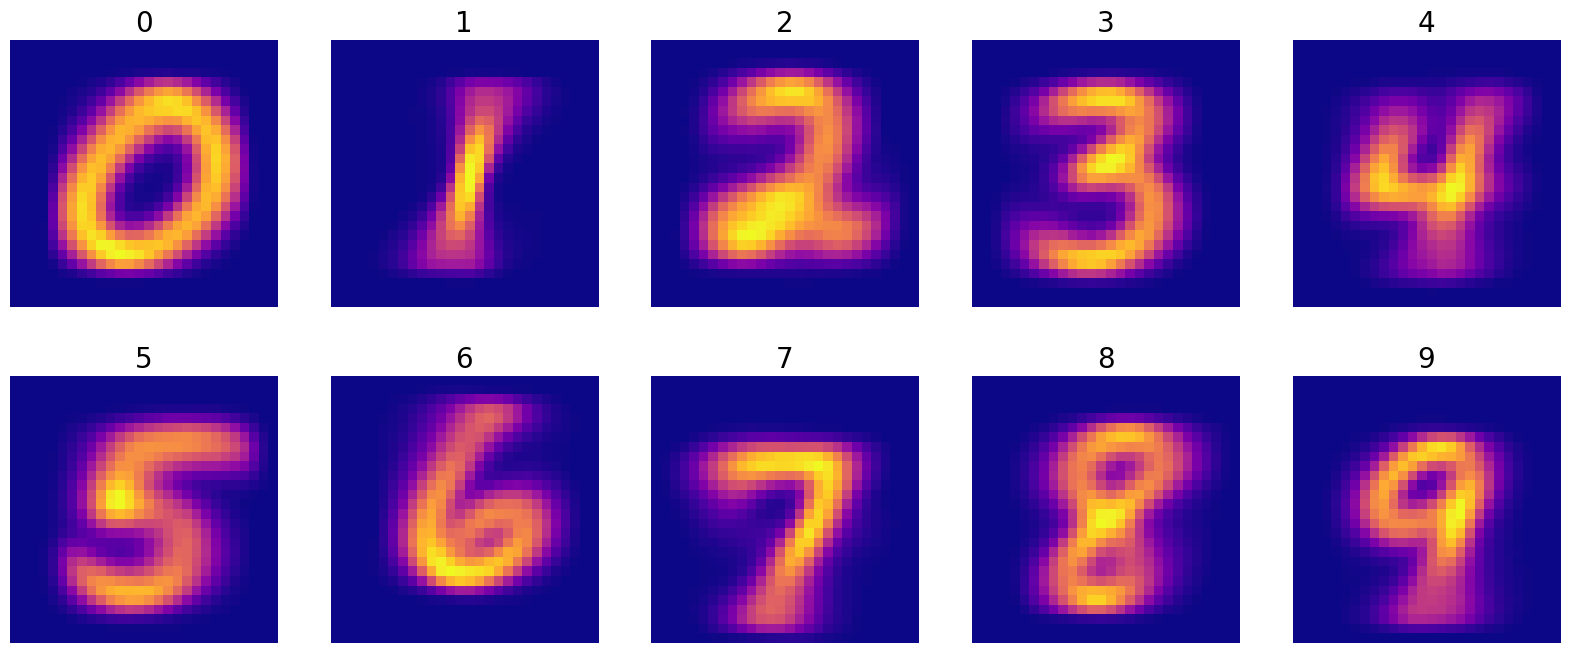

In [14]:
nb_params = {}
for i in range(0, 10):
    nb_params[i] = np.exp(nb.feature_log_prob_[i])

plot_digits(nb_params)


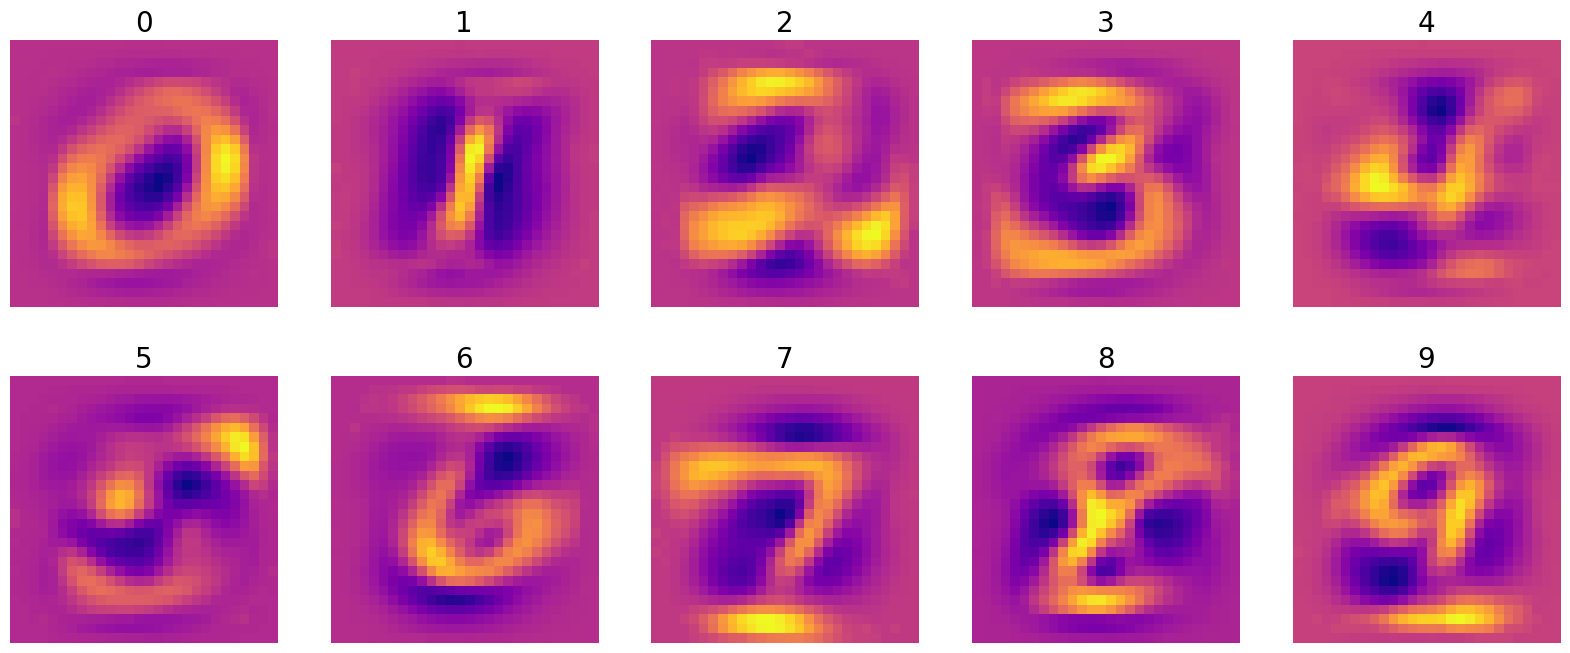

In [15]:
lda_params = {}
for i in range(0 ,10):
    lda_params[i] = lda.means_[i]
plot_digits(lda_params )

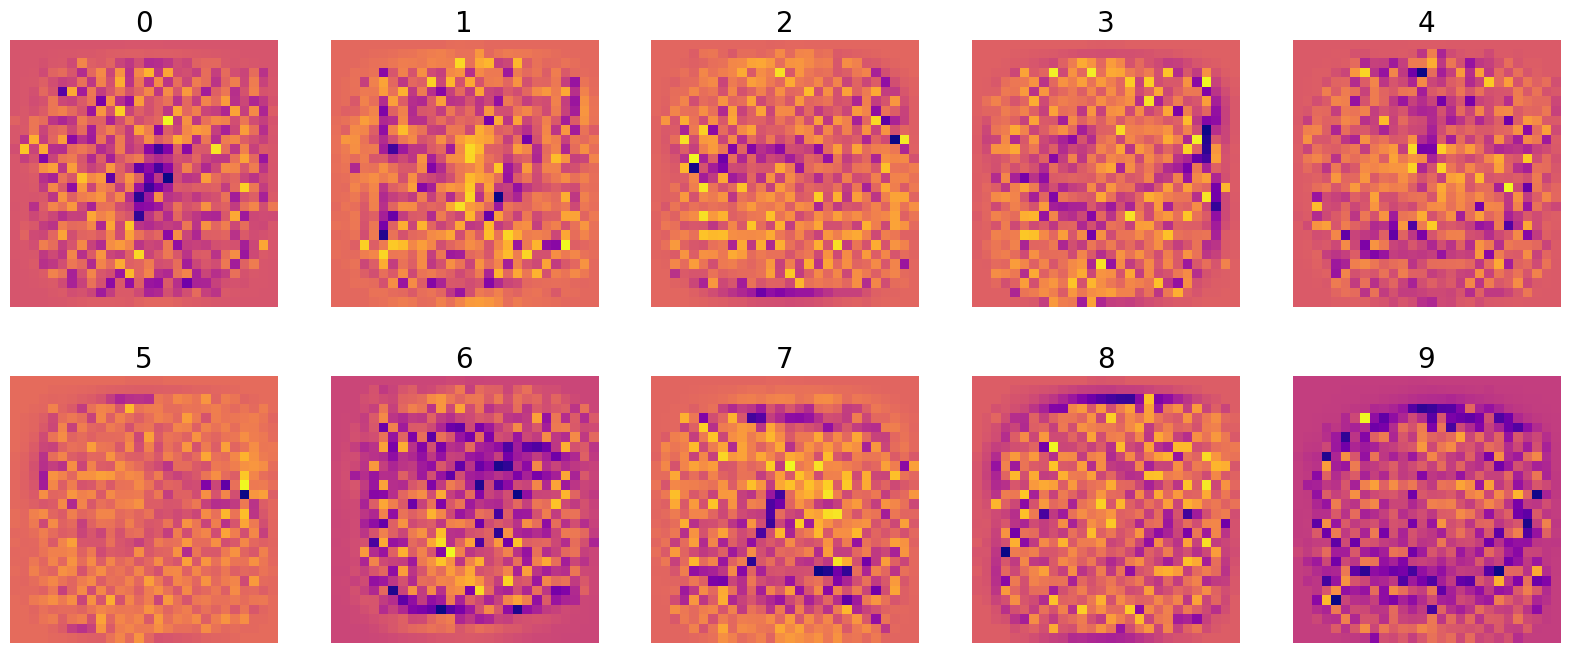

In [16]:
log_reg_params = {}
for i in range(0 ,10):
    log_reg_params[i] = lr.coef_[i]

plot_digits(log_reg_params)

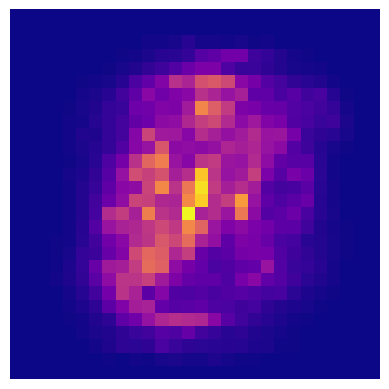

In [93]:
rf_params = rf.feature_importances_.reshape(28 ,28)

plt.axis("off")
plt.imshow(rf_params, cmap="plasma")

In [18]:
nn_params_1 = {}
for i in range(0 ,100):
    nn_params_1[i] = nn.coefs_[0][: ,i]
    indexes = [i for i in range(0 ,100)]
    
plot_digits(nn_params_1,
            n_rows = 10,
            n_cols = 10,
            fig_shape = (100 ,100),
            indexes = indexes,
            img_shape = (28 ,28) ,
            labels = None)


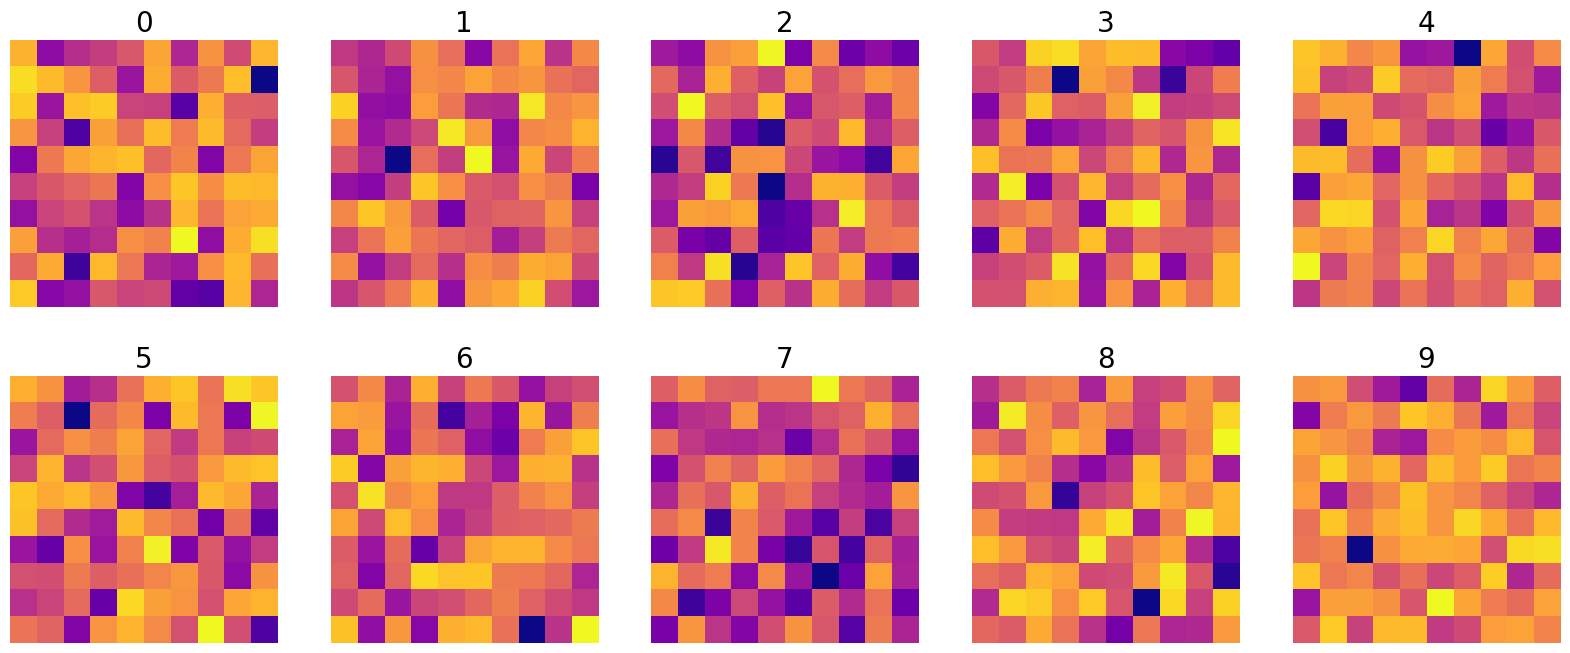

In [19]:
nn_params_2 = {}
for i in range(0, 10):
    nn_params_2[i] = nn.coefs_[1][: ,i]
    
plot_digits(nn_params_2,
            n_rows = 2,
            n_cols = 5,
            fig_shape = (20, 8),
            img_shape = (10, 10))


In [20]:
# Matriz de confusão do Naive Bayes

naive_bayes = nb.fit(X_train, y_train)
y_hat = naive_bayes.predict(X_test)

confusion_matrix(y_test, y_hat)

array([[1198,    1,    7,    3,    2,   54,   43,    1,   31,    3],
       [   0, 1525,    6,    6,    1,   17,    4,    1,   38,    2],
       [  17,   28, 1131,   45,   25,    7,   55,   14,   53,    5],
       [  10,   32,   63, 1161,    3,   33,   13,   16,   59,   43],
       [   5,    8,    9,    1, 1014,    6,   26,    3,   23,  200],
       [  24,   21,   11,  176,   34,  911,   27,    5,   36,   28],
       [  16,   38,   25,    1,   20,   31, 1261,    0,    4,    0],
       [   7,   31,   10,    5,   36,    2,    1, 1277,   30,  104],
       [  14,   68,   19,  100,   12,   49,   12,    5, 1024,   54],
       [  10,   31,   10,   13,  100,    9,    0,   49,   30, 1168]],
      dtype=int64)

**6 (Rede neural, aproximação universal)**

In [22]:
# 6 (Rede neural, aproximação universal)
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, w, b):
    z = w*x + b
    return 1/(1 + np.exp(-z))

x = np.linspace(-5, 5, 1000)

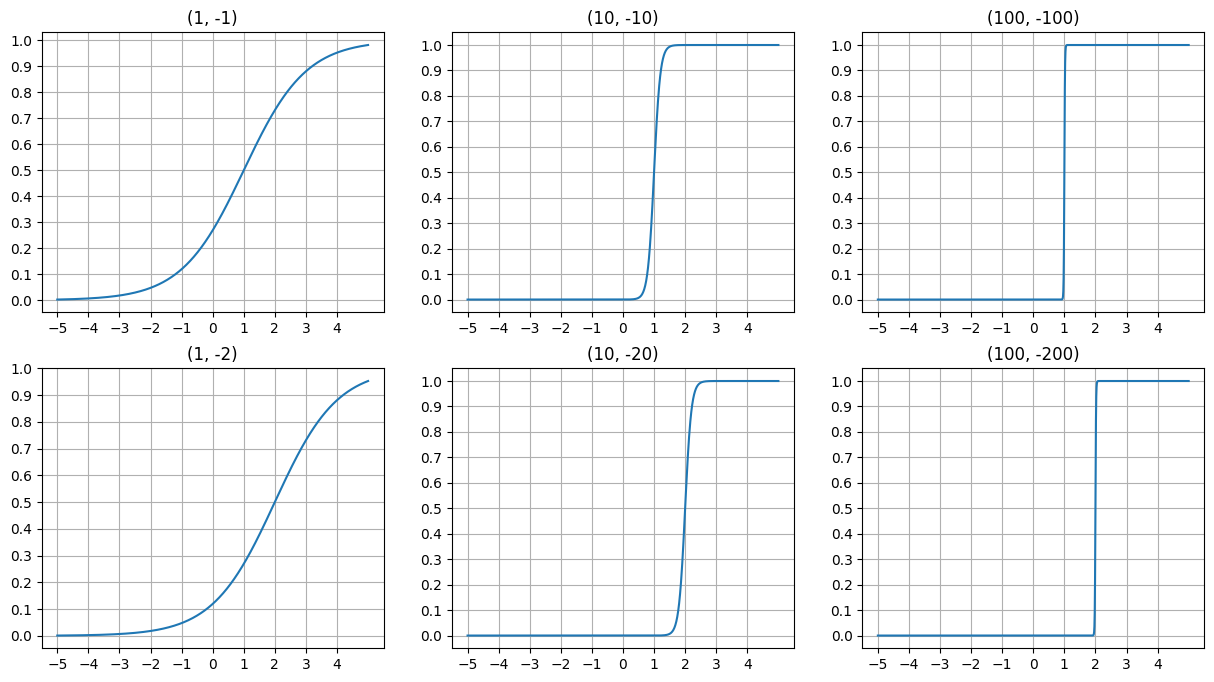

In [91]:
# a) Desenhando a função sigmoid com mudanças no w e b.

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 8))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

parametros = [(1, -1), (10, -10), (100, -100), (1, -2), (10, -20), (100, -200)]

for i, parametro in enumerate(parametros):
    funcao = sigmoid(x, parametro[0], parametro[1])
    axs[i].grid()
    axs[i].plot(x, funcao)
    axs[i].set_title(parametros[i])
    axs[i].set_xticks(np.arange(-5, 5, 1))
    axs[i].set_yticks(np.arange(0, 1.1, 0.1))

Observando esses gráficos e também fazendo alguns outros, percebe-se que o -b/w nos diz qual é o ponto de inflexão da função. E a magnitude do w e do b nos diz o quão rápido há mudança na derivada da função.

Text(0.5, 1.0, 'Padrão')

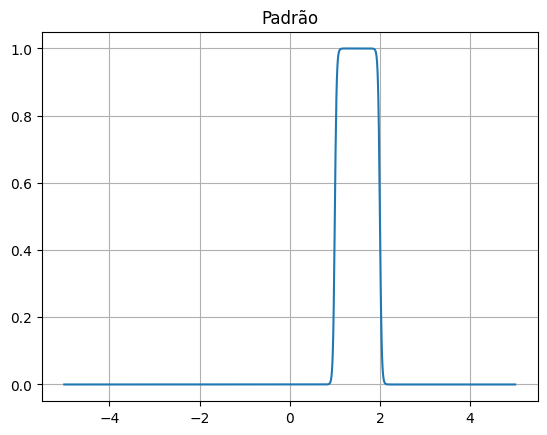

In [117]:
# b) Desenhando o y em função das sigmoids.

x = np.linspace(-5, 5, 1000)

a = 1
c = 1
d = 1

h1 = sigmoid(x, 50, -c*50)
h2 = sigmoid(x, 50, -(c+d)*50)

y = a*h1 - a*h2

plt.plot(x, y)
plt.grid()
plt.title('Padrão')

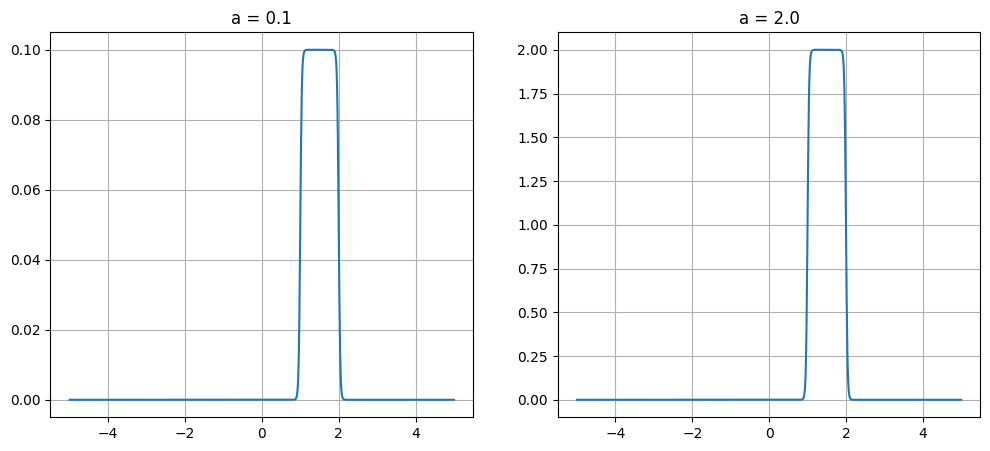

In [108]:
# Variando o a
As = np.linspace(0.1, 2, 2)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
axs = [ax1, ax2]

for ax, a in zip(axs, As):
    y = a*h1 - a*h2
    ax.plot(x, y)
    ax.set_title(f'a = {a}')
    ax.grid()

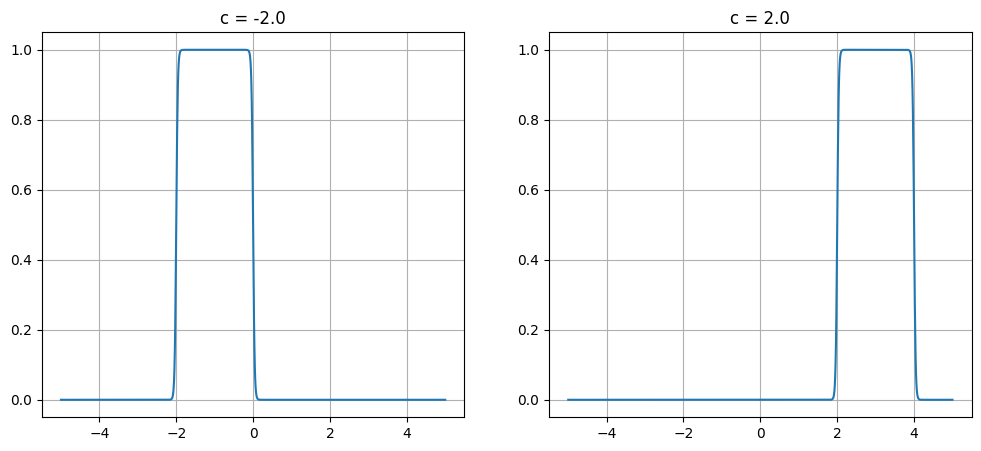

In [115]:
# Variando o c
Cs = np.linspace(-2, 2, 2)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
axs = [ax1, ax2]

for ax, c in zip(axs, Cs):
    h1 = sigmoid(x, 50, -c*50)
    h2 = sigmoid(x, 50, -(c+d)*50)
    y = a*h1 - a*h2
    
    ax.plot(x, y)
    ax.set_title(f'c = {c}')
    ax.grid()

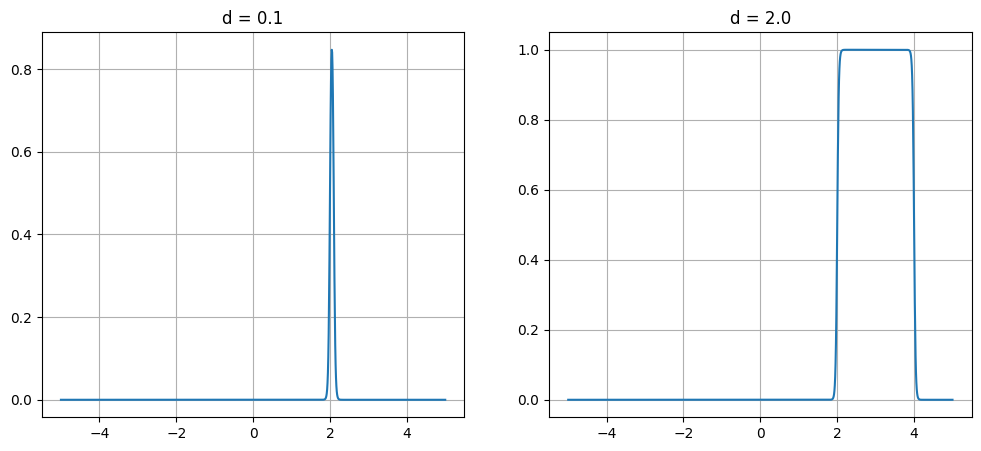

In [116]:
# Variando o d
Ds = np.linspace(0.1, 2, 2)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
axs = [ax1, ax2]

for ax, d in zip(axs, Ds):
    h1 = sigmoid(x, 50, -c*50)
    h2 = sigmoid(x, 50, -(c+d)*50)
    y = a*h1 - a*h2
    
    ax.plot(x, y)
    ax.set_title(f'd = {d}')
    ax.grid()

O $a$ influência no valor que a função terá que seja diferente de $0$.<br>
O $c$ influência em qual valor de $x$ a função começara a ter esse valor.<br>
O $d$ influência em qual valor de $x$ a função deixará de ter esse valor e voltará a $0$.

(A partir de $c$ a função terá o valor $a$ até que atinja $c+d$ e volte a ser $0$)

c) Primeiro usaremos o layout da função passada. Mas dessa vez teremos 2 conjuntos para fazer o que fizemos. Então manipularemos pra que 2 'neurônios' trabalhem juntos para satisfazer o primeiro caso da função. E os outros 2 'neurônios' farão o segundo caso da função.

C:\Users\samsung\AppData\Local\Temp\ipykernel_9568\2511185366.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


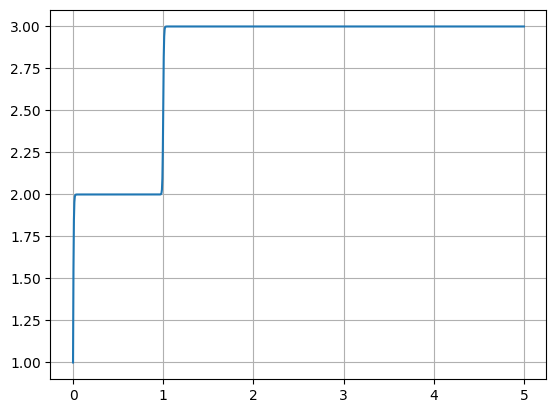

In [126]:
# Plotando o gráfico da função que queremos aproximar.

x = np.linspace(0, 5, 1000)

w = 250

a_1 = 2
c_1 = 0
d_1 = 1

h1 = sigmoid(x, w, -c_1*w)
h2 = sigmoid(x, w, -(c_1 + d_1)*w)

y_1 = a_1*h1 - a_1*h2


a_2 = 3
c_2 = 1
d_2 = 5

h3 = sigmoid(x, w, -c_2*w)
h4 = sigmoid(x, w, -(c_2 + d_2)*w)

y_2 = a_2*h3 - a_2*h4

y_final = y_1 + y_2

plt.plot(x, y_final)
plt.grid()

d) Imaginando que temos ilimitados neurônios é bem simples imaginar uma forma de aproximar qualquer f(x) contínua no intervalo [0, 1].<br>

Primeiro: Separaríamos dois a dois neurônios para poder repetir o processo acima.<br>
Segundo: Definiríamos os nossos parâmetros com base na nossa função.

$a_k = f(x)$<br>
$c_k = x$<br>
$d_k = \lim_{\epsilon \to 0} x-\epsilon$

Definindo assim a nossa aproximação terá o valor $f(x)$ no ponto $x$ durante todo o intervalo.

**7 - (Compressão com k)**

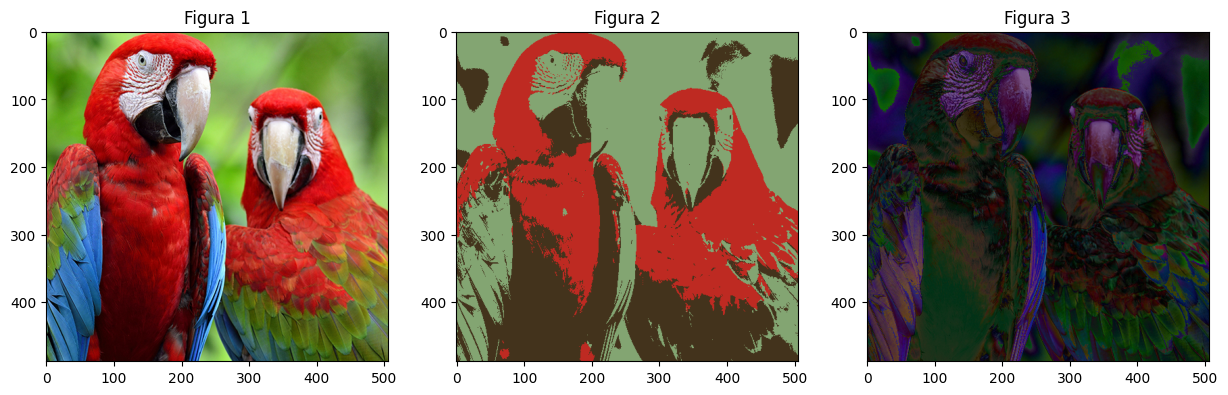

In [182]:
# Importando as coisas pedidas

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from tqdm import tqdm
import os

def function_1(img, parameter):
    temp = np.reshape(img, (int(img.shape[0]*img.shape[1]) , 3))
    model = KMeans(n_clusters=parameter, random_state=0, n_init=1).fit(temp)

    output = model.cluster_centers_[model.labels_]
    output = np.reshape(output, (img.shape[0], img.shape[1], 3))
    return output

imagem = mpimg.imread('araras.png')
output = function_1(imagem, 3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15 ,15))

ax1.imshow(imagem)
ax1.set_title("Figura 1")

ax2.imshow(output)
ax2.set_title(f"Figura 2")

ax3.imshow(np.abs(imagem - output ))
ax3.set_title("Figura 3")

plt.show ()


Text(0.5, 1.0, 'output 3')

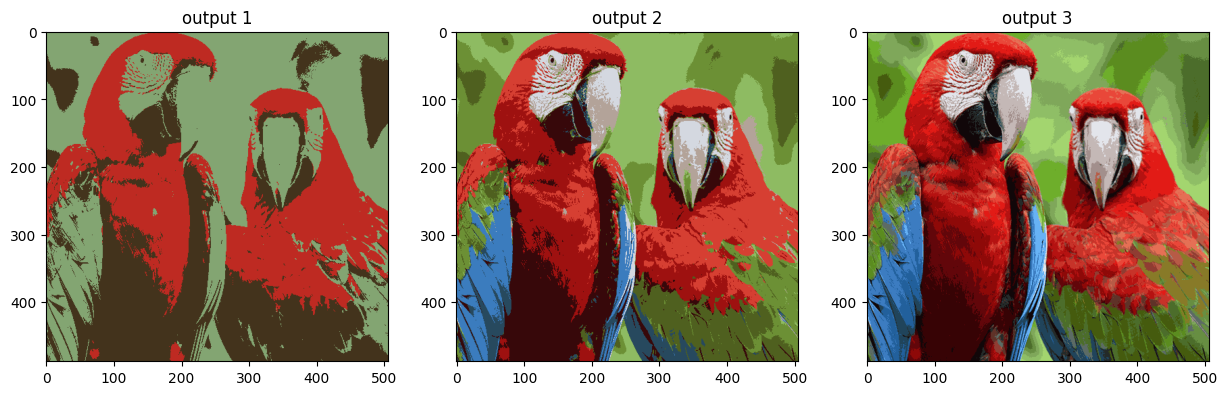

In [183]:
output_1 = function_1(imagem, 3)

output_2 = function_1(imagem, 10)

output_3 = function_1(imagem, 30)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15 ,15))

ax1.imshow(output_1)
ax1.set_title(f"output 1")

ax2.imshow(output_2)
ax2.set_title(f"output 2")

ax3.imshow(output_3)
ax3.set_title(f"output 3")